## Universidad del Valle de Guatemala
### Data Science
#### Juan Marroquin 19845
#### Carlos Raxtum 19721

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#### PRIMEROS 3 EJERCICIOS EN EL NOTEBOOK getInfo.ipynb

In [2]:
df = pd.read_csv('covid19.csv',encoding='utf-8')

C:\Users\melma\AppData\Local\Temp\ipykernel_2744\3704449094.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('covid19.csv',encoding='utf-8')


##### drop subregion column

In [3]:
df = df.drop(['subregion'], axis=1)

##### check for negative values and removed it

In [4]:
df = df.query('not (confirmed < 0 or death < 0 or recovered <0) ')

##### drop duplicates

In [5]:
df = df.drop_duplicates()

#### Analisis Exploratorio

In [6]:
df.head()

,country,date,lat,long,confirmed,death,recovered,population,area_sq_km,density_sq_km
0,Afghanistan,2020-01-22,33.93911,67.709953,0,0,0.0,41439625.0,652230.0,63.0
1,Afghanistan,2020-01-23,33.93911,67.709953,0,0,0.0,41439625.0,652230.0,63.0
2,Afghanistan,2020-01-24,33.93911,67.709953,0,0,0.0,41439625.0,652230.0,63.0
3,Afghanistan,2020-01-25,33.93911,67.709953,0,0,0.0,41439625.0,652230.0,63.0
4,Afghanistan,2020-01-26,33.93911,67.709953,0,0,0.0,41439625.0,652230.0,63.0


##### Shape of dataframe

In [7]:
df.shape

(270481, 10)

##### Describe df

In [8]:
df.describe()

,lat,long,confirmed,death,recovered,population,area_sq_km,density_sq_km
count,268477.000000,268477.000000,2.704810e+05,2.704810e+05,2.545000e+05,2.704810e+05,2.704810e+05,270481.000000
mean,20.471120,22.314081,8.256086e+05,1.274123e+04,9.060618e+04,2.124795e+08,2.456829e+06,256.165409
std,25.694558,78.806949,4.286766e+06,6.075034e+04,7.793106e+05,4.701630e+08,3.935168e+06,1226.916897
min,-51.796300,-178.116500,0.000000e+00,0.000000e+00,0.000000e+00,5.100000e+02,1.000000e+00,2.000000
25%,4.860416,-51.925300,4.720000e+02,3.000000e+00,0.000000e+00,5.197606e+06,5.110000e+04,29.000000
50%,22.300000,21.745300,1.174200e+04,1.250000e+02,0.000000e+00,2.283576e+07,2.729670e+05,115.000000
75%,41.204380,90.433600,1.984510e+05,2.695000e+03,1.802250e+03,6.604078e+07,1.904569e+06,171.000000
max,71.706900,178.065000,9.708366e+07,1.066584e+06,3.097475e+07,1.425866e+09,1.709824e+07,18235.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270481 entries, 0 to 270539
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   country        270481 non-null  object 
 1   date           270481 non-null  object 
 2   lat            268477 non-null  float64
 3   long           268477 non-null  float64
 4   confirmed      270481 non-null  int64  
 5   death          270481 non-null  int64  
 6   recovered      254500 non-null  float64
 7   population     270481 non-null  float64
 8   area_sq_km     270481 non-null  float64
 9   density_sq_km  270481 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 22.7+ MB


In [10]:
# replace nan in recoverd column with 0
# we asume a Nan values means that nobody was recoverd from covid that day
df['recovered']=df['recovered'].fillna(0)

In [11]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Ivory Coast', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana',
       'Haiti', 'Vatican City', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isra

In [12]:
# remove from the country columns
remove_country = ['Diamond Princess','Winter Olympics 2022','MS Zaandam','Summer Olympics 2020']
for fake in remove_country:
    df = df.drop(df[df.country == fake ].index)
    df.reset_index(drop=True)

#### Null values in dataset

[Text(0.5, 1.0, 'Null values in dataset')]

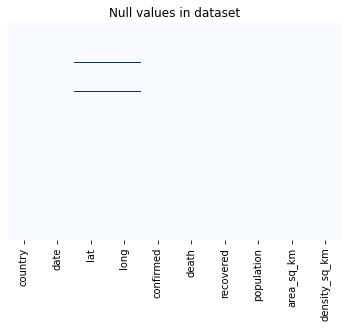

In [13]:
figure = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
figure.set(title = "Null values in dataset")

In [14]:
df.isnull().sum()

country             0
date                0
lat              2004
long             2004
confirmed           0
death               0
recovered           0
population          0
area_sq_km          0
density_sq_km       0
dtype: int64

##### Get what Countries does not have lat and long values

In [15]:
df[df.lat.isnull()].country.unique()

array(['Canada', 'China'], dtype=object)

In [16]:
coutries_lat_long = {
    'Canada': {
        'lat': 45.424721,
        'long':-75.695000
    },
    'China': {
        'lat':39.916668,
        'long':116.383331
    },
}

##### Replace the Nan values

In [17]:
for country_fix in coutries_lat_long:
    df.loc[df["country"] == country_fix, "lat"] = coutries_lat_long[country_fix]['lat']
    df.loc[df["country"] == country_fix, "long"] = coutries_lat_long[country_fix]['long']

## After cleaning the data get the new statistics 

In [18]:
df.describe()

,lat,long,confirmed,death,recovered,population,area_sq_km,density_sq_km
count,270481.000000,270481.000000,2.704810e+05,2.704810e+05,2.704810e+05,2.704810e+05,2.704810e+05,270481.000000
mean,21.384504,23.124621,8.256086e+05,1.274123e+04,8.525284e+04,2.124795e+08,2.456829e+06,256.165409
std,25.542569,78.644519,4.286766e+06,6.075034e+04,7.562396e+05,4.701630e+08,3.935168e+06,1226.916897
min,-51.796300,-178.116500,0.000000e+00,0.000000e+00,0.000000e+00,5.100000e+02,1.000000e+00,2.000000
25%,6.423800,-55.765800,4.720000e+02,3.000000e+00,0.000000e+00,5.197606e+06,5.110000e+04,29.000000
50%,23.885942,21.745300,1.174200e+04,1.250000e+02,0.000000e+00,2.283576e+07,2.729670e+05,115.000000
75%,40.463667,101.975766,1.984510e+05,2.695000e+03,1.310000e+03,6.604078e+07,1.904569e+06,171.000000
max,71.706900,178.065000,9.708366e+07,1.066584e+06,3.097475e+07,1.425866e+09,1.709824e+07,18235.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270481 entries, 0 to 270539
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   country        270481 non-null  object 
 1   date           270481 non-null  object 
 2   lat            270481 non-null  float64
 3   long           270481 non-null  float64
 4   confirmed      270481 non-null  int64  
 5   death          270481 non-null  int64  
 6   recovered      270481 non-null  float64
 7   population     270481 non-null  float64
 8   area_sq_km     270481 non-null  float64
 9   density_sq_km  270481 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 22.7+ MB


#### Null values in dataset

[Text(0.5, 1.0, 'Null values in dataset')]

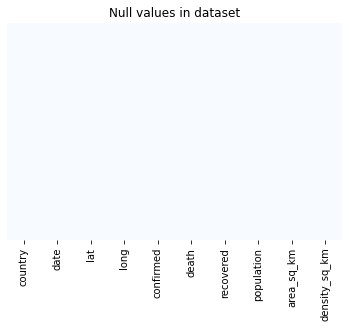

In [20]:
figure = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
figure.set(title = "Null values in dataset")

#### Some graphs 

### Create new column with the new cases of covid 

In [21]:
new_cases = df.sort_values(by=['country','date']).filter(['country','date','confirmed']).groupby(['country']).confirmed.diff()
# manera de evitar casos negativos
# 1 lambda
# 2 if
# 3 despues de aggergar la columna elimar los negativos

In [22]:
df = df.assign(new_cases = new_cases)

In [23]:
df.loc[df['new_cases'] < 0, 'new_cases'] = 0

### Create new column of the new infected people

In [24]:
df['infected'] = df.confirmed - df.death - df.recovered
# manera de evitar casos negativos
# 1 lambda
# 2 if
# 3 despues de aggergar la columna elimar los negativos

In [25]:
df.loc[df['infected'] < 0, 'infected'] = 0

In [26]:
df.tail()

,country,date,lat,long,confirmed,death,recovered,population,area_sq_km,density_sq_km,new_cases,infected
270535,Zimbabwe,2022-10-15,-19.015438,29.154857,257827,5605,0.0,16415563.0,390757.0,42.0,0.0,252222.0
270536,Zimbabwe,2022-10-16,-19.015438,29.154857,257893,5606,0.0,16415563.0,390757.0,42.0,66.0,252287.0
270537,Zimbabwe,2022-10-17,-19.015438,29.154857,257893,5606,0.0,16415563.0,390757.0,42.0,0.0,252287.0
270538,Zimbabwe,2022-10-18,-19.015438,29.154857,257893,5606,0.0,16415563.0,390757.0,42.0,0.0,252287.0
270539,Zimbabwe,2022-10-19,-19.015438,29.154857,257893,5606,0.0,16415563.0,390757.0,42.0,0.0,252287.0


In [27]:
df.describe()

,lat,long,confirmed,death,recovered,population,area_sq_km,density_sq_km,new_cases,infected
count,270481.000000,270481.000000,2.704810e+05,2.704810e+05,2.704810e+05,2.704810e+05,2.704810e+05,270481.000000,2.702990e+05,2.704810e+05
mean,21.384504,23.124621,8.256086e+05,1.274123e+04,8.525284e+04,2.124795e+08,2.456829e+06,256.165409,1.003089e+05,7.276938e+05
std,25.542569,78.644519,4.286766e+06,6.075034e+04,7.562396e+05,4.701630e+08,3.935168e+06,1226.916897,1.242191e+06,4.167060e+06
min,-51.796300,-178.116500,0.000000e+00,0.000000e+00,0.000000e+00,5.100000e+02,1.000000e+00,2.000000,0.000000e+00,0.000000e+00
25%,6.423800,-55.765800,4.720000e+02,3.000000e+00,0.000000e+00,5.197606e+06,5.110000e+04,29.000000,0.000000e+00,4.100000e+01
50%,23.885942,21.745300,1.174200e+04,1.250000e+02,0.000000e+00,2.283576e+07,2.729670e+05,115.000000,2.600000e+01,4.003000e+03
75%,40.463667,101.975766,1.984510e+05,2.695000e+03,1.310000e+03,6.604078e+07,1.904569e+06,171.000000,8.890000e+02,8.116000e+04
max,71.706900,178.065000,9.708366e+07,1.066584e+06,3.097475e+07,1.425866e+09,1.709824e+07,18235.000000,3.543479e+07,9.601708e+07


In [28]:
df.query('(new_cases < 0 or infected < 0) ')

,country,date,lat,long,confirmed,death,recovered,population,area_sq_km,density_sq_km,new_cases,infected


#### Normalize data

In [36]:
df = df.assign(death_by_million=lambda x:(round((x['death'] * 100000) / x['population'])))
df = df.assign(recovered_by_million=lambda x:(round((x['recovered'] * 100000) / x['population'])))
df = df.assign(infected_by_million=lambda x:(round((x['infected'] * 100000) / x['population'])))
df = df.assign(confirmed_by_million=lambda x:(round((x['confirmed'] * 100000) / x['population'])))

In [37]:
df.tail()

,country,date,lat,long,confirmed,death,recovered,population,area_sq_km,density_sq_km,new_cases,infected,death_by_million,recovered_by_million,infected_by_million,confirmed_by_million
270535,Zimbabwe,2022-10-15,-19.015438,29.154857,257827,5605,0.0,16415563.0,390757.0,42.0,0.0,252222.0,34.0,0.0,1536.0,1571.0
270536,Zimbabwe,2022-10-16,-19.015438,29.154857,257893,5606,0.0,16415563.0,390757.0,42.0,66.0,252287.0,34.0,0.0,1537.0,1571.0
270537,Zimbabwe,2022-10-17,-19.015438,29.154857,257893,5606,0.0,16415563.0,390757.0,42.0,0.0,252287.0,34.0,0.0,1537.0,1571.0
270538,Zimbabwe,2022-10-18,-19.015438,29.154857,257893,5606,0.0,16415563.0,390757.0,42.0,0.0,252287.0,34.0,0.0,1537.0,1571.0
270539,Zimbabwe,2022-10-19,-19.015438,29.154857,257893,5606,0.0,16415563.0,390757.0,42.0,0.0,252287.0,34.0,0.0,1537.0,1571.0
